# 유용한 기능들

In [1]:
import cv2
import numpy as np
import sys

### 마스크 연산

In [2]:
src = cv2.imread('./data/lenna.bmp', cv2.IMREAD_COLOR)
mask = cv2.imread('./data/mask_smile.bmp', cv2.IMREAD_GRAYSCALE)

if src is None or mask is None:
    print('Image load failed')
    sys.exit()
    
src[mask > 0] = (0, 255, 255)

cv2.imshow('src', src)
cv2.imshow('mask', mask)

cv2.waitKey()
cv2.destroyAllWindows()

In [3]:
src = cv2.imread('./data/airplane.bmp', cv2.IMREAD_COLOR)
mask = cv2.imread('./data/mask_plane.bmp', cv2.IMREAD_GRAYSCALE)
dst = cv2.imread('./data/field.bmp', cv2.IMREAD_COLOR)

if src is None or mask is None or dst is None:
    print('Image load failed')
    sys.exit()

dst[mask > 0] = src[mask > 0]

cv2.imshow('src', src)
cv2.imshow('mask', mask)
cv2.imshow('dst', dst)

cv2.waitKey()
cv2.destroyAllWindows()

### 연산 시간 측정

In [4]:
src = cv2.imread('./data/lenna.bmp', cv2.IMREAD_COLOR)

if src is None:
    print('Image load failed')
    sys.exit()

dst = np.empty(src.shape, dtype=src.dtype)

tm = cv2.TickMeter()
tm.start()
for x in range(src.shape[0]):
    for y in range(src.shape[1]):
        dst[x, y] = 255 - src[x, y]
tm.stop()
print(tm.getTimeMilli())
print(tm.getTimeSec())
print(tm.getTimeMicro())
print(tm.getCounter())

cv2.imshow('src', src)
cv2.imshow('dst', dst)

cv2.waitKey()
cv2.destroyAllWindows()

533.3
0.5333
533300.0
1


In [5]:
src = cv2.imread('./data/lenna.bmp', cv2.IMREAD_COLOR)

if src is None:
    print('Image load failed')
    sys.exit()

dst = np.empty(src.shape, dtype=src.dtype)

tm = cv2.TickMeter()
tm.start()
dst = 255 - src
tm.stop()
print(tm.getTimeMilli())
print(tm.getTimeSec())
print(tm.getTimeMicro())
print(tm.getCounter())

cv2.imshow('src', src)
cv2.imshow('dst', dst)

cv2.waitKey()
cv2.destroyAllWindows()

0.9301999999999999
0.0009302
930.1999999999999
1


In [6]:
src = cv2.imread('./data/lenna.bmp', cv2.IMREAD_GRAYSCALE)
print(np.sum(src))
print(np.mean(src))

minVal, maxVal, minPos, maxPos = cv2.minMaxLoc(src)
print("minVal :", minVal, "maxVal :", maxVal, "minPos :", minPos, "maxPos :", maxPos)

data = np.array([[-1, -0.5, 0, 0.5, 1]], dtype=np.float32)
normed_data = cv2.normalize(data, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
print("normalized data :", normed_data)

32518590
124.04857635498047
minVal : 25.0 maxVal : 245.0 minPos : (508, 71) maxPos : (116, 273)
normalized data : [[  0  64 128 191 255]]


### 영상 밝기 조절

In [7]:
def saturated(value):
    value[value > 255] = 255
    value[value < 5] = 0
    return value

src = cv2.imread('./data/lenna.bmp', cv2.IMREAD_GRAYSCALE)
dst = np.empty(src.shape, src.dtype)

src = saturated(src+100)
cv2.imshow('src', src)

cv2.waitKey()
cv2.destroyAllWindows()

In [8]:
def saturated(arr, value):
    arr += value
    if arr > 255:
        arr = 255
    elif arr < 0:
        arr = 0
    return arr

src = cv2.imread('./data/lenna.bmp', cv2.IMREAD_GRAYSCALE)
dst = np.empty(src.shape, src.dtype)

func = np.vectorize(saturated)
dst = np.array(func(src, 100), dtype=np.uint8)
cv2.imshow('src', src)
cv2.imshow('dst', dst)

cv2.waitKey()
cv2.destroyAllWindows()

In [9]:
def saturated(value):
    if value > 255:
        value = 255
    elif value < 0:
        value = 0
    return value

src = cv2.imread('./data/lenna.bmp', cv2.IMREAD_GRAYSCALE)
dst = np.empty(src.shape, src.dtype)
dst = np.vectorize(saturated)(src+100.0).astype('uint8')

cv2.imshow('src', src)
cv2.imshow('dst', dst)

cv2.waitKey()
cv2.destroyAllWindows()

In [10]:
src = cv2.imread('./data/lenna.bmp', cv2.IMREAD_GRAYSCALE)

src = np.clip(src+100.0, 0, 255)
src = np.array(src, dtype=np.uint8)
cv2.imshow('src', src)

cv2.waitKey()
cv2.destroyAllWindows()

In [11]:
src = cv2.imread('./data/lenna.bmp', cv2.IMREAD_GRAYSCALE)
dst = np.empty(src.shape, dtype=src.dtype)
dst = np.clip(src+100.0, 0, 255).astype('uint8')
cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()

In [12]:
src = cv2.imread('./data/lenna.bmp', cv2.IMREAD_GRAYSCALE)
dst = cv2.add(src, 100)

cv2.imshow('src', src)
cv2.imshow('dst', dst)

cv2.waitKey()
cv2.destroyAllWindows()

In [13]:
def update(pos):
    dst = cv2.add(src, pos)
    cv2.imshow('src', dst)

src = cv2.imread('./data/lenna.bmp', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed')
    sys.exit()

cv2.imshow('src', src)
cv2.createTrackbar('brightness', 'src', 0, 100, update)

cv2.waitKey()
cv2.destroyAllWindows()

### 영상의 명암비 조절

In [14]:
src = cv2.imread('./data/lenna.bmp', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed')
    sys.exit()

s = 2.0
dst = cv2.multiply(src, s)

cv2.imshow('src', src)
cv2.imshow('dst', dst)

cv2.waitKey()
cv2.destroyAllWindows()

In [15]:
src = cv2.imread('./data/lenna.bmp', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed')
    sys.exit()

alpha = 1.0
dst = np.clip(src + (src - 128.) * alpha, 0, 255).astype('uint8')

cv2.imshow('src', src)
cv2.imshow('dst', dst)

cv2.waitKey()
cv2.destroyAllWindows()

### 히스토그램 분석

In [16]:
# 히스토그램 구하기 - 간단한 행렬
src = np.array([[0, 0, 0, 0],
                [1, 2, 3, 5],
                [6, 1, 1, 3],
                [4, 3, 1, 7]], dtype=np.uint8)

hist1 = cv2.calcHist(images=[src], channels=[0], mask=None, histSize=[4], ranges=[0, 8])
print("hist1 :\n", hist1)
hist2 = cv2.calcHist(images=[src], channels=[0], mask=None, histSize=[8], ranges=[0, 8])
print("hist2 :\n",hist2)
hist3 = cv2.calcHist(images=[src], channels=[0], mask=None, histSize=[8], ranges=[0, 4])
print("hist3 :\n",hist3)

hist1 :
 [[8.]
 [4.]
 [2.]
 [2.]]
hist2 :
 [[4.]
 [4.]
 [1.]
 [3.]
 [1.]
 [1.]
 [1.]
 [1.]]
hist3 :
 [[4.]
 [0.]
 [4.]
 [0.]
 [1.]
 [0.]
 [3.]
 [0.]]


262144.0 262144


<BarContainer object of 32 artists>

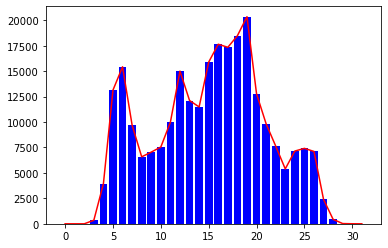

In [18]:
import matplotlib.pyplot as plt
src = cv2.imread('./data/lenna.bmp', cv2.IMREAD_GRAYSCALE)
hist = cv2.calcHist(images=[src], channels=[0], mask=None, histSize=[32], ranges=[0, 255])

print(hist.sum(), (src.shape[0] * src.shape[1]))

plt.plot(hist, color='r')

hist = hist.flatten()
plt.bar(np.arange(32), hist, color='b')

262144.0 262144


<BarContainer object of 256 artists>

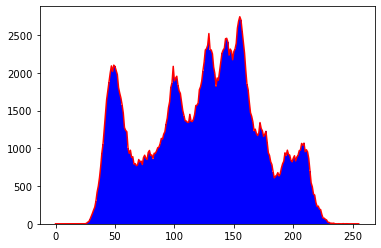

In [19]:
src = cv2.imread('./data/lenna.bmp', cv2.IMREAD_GRAYSCALE)
hist = cv2.calcHist(images=[src], channels=[0], mask=None, histSize=[256], ranges=[0, 255])

print(hist.sum(), (src.shape[0] * src.shape[1]))

plt.plot(hist, color='r')

hist = hist.flatten()
plt.bar(np.arange(256), hist, width=1, color='b')

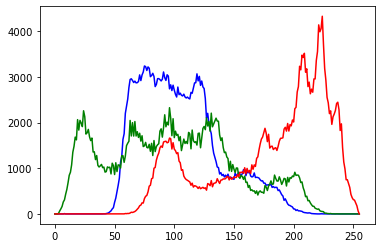

In [20]:
src = cv2.imread('./data/lenna.bmp', cv2.IMREAD_COLOR)

color = ['b', 'g', 'r']
for i in range(3):
    hist = cv2.calcHist(images=[src], channels=[i], mask=None, histSize=[256], ranges=[0,255])
    plt.plot(hist, color=color[i])

In [21]:
# min max scaling (정규화)
a = np.arange(12).reshape(4,3)
(a - a.min())/(a.max() - a.min())

array([[0.        , 0.09090909, 0.18181818],
       [0.27272727, 0.36363636, 0.45454545],
       [0.54545455, 0.63636364, 0.72727273],
       [0.81818182, 0.90909091, 1.        ]])

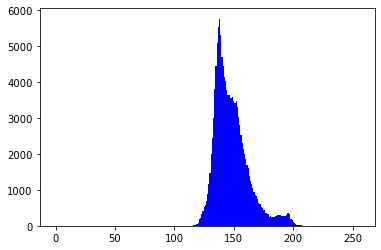

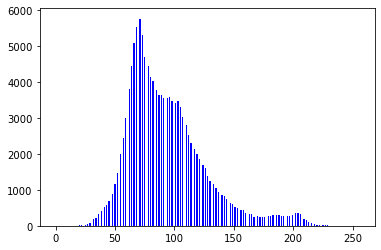

In [22]:
src = cv2.imread('./data/hawkes.bmp', cv2.IMREAD_GRAYSCALE)

minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(src)

dst = (src - minVal)/(maxVal - minVal) * 255
dst = np.array(dst, dtype=np.uint8)

src_hist = cv2.calcHist(images=[src], channels=[0], mask=None, histSize=[256], ranges=[0, 256])
dst_hist = cv2.calcHist(images=[dst], channels=[0], mask=None, histSize=[256], ranges=[0, 256])

src_hist = src_hist.flatten()
binX = np.arange(256)
plt.bar(binX, src_hist, width=1, color='b')
plt.show()

dst_hist = dst_hist.flatten()
binX = np.arange(256)
plt.bar(binX, dst_hist, width=1, color='b')
plt.show()

In [23]:
cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()

### 히스토그램 평활화

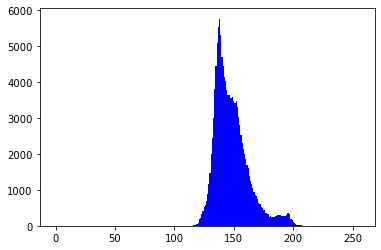

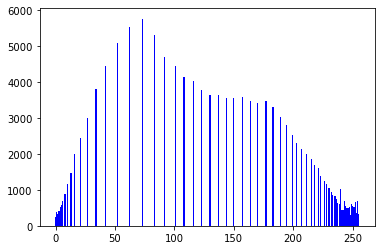

In [24]:
src = cv2.imread('./data/hawkes.bmp', cv2.IMREAD_GRAYSCALE)

dst = cv2.equalizeHist(src)

src_hist = cv2.calcHist(images=[src], channels=[0], mask=None, histSize=[256], ranges=[0, 256])
dst_hist = cv2.calcHist(images=[dst], channels=[0], mask=None, histSize=[256], ranges=[0, 256])

src_hist = src_hist.flatten()
binX = np.arange(256)
plt.bar(binX, src_hist, width=1, color='b')
plt.show()

dst_hist = dst_hist.flatten()
binX = np.arange(256)
plt.bar(binX, dst_hist, width=1, color='b')
plt.show()

### 히스토그램 평활화(Color Image)

In [25]:
src = cv2.imread('./data/pepper.bmp')

b = src[:, :, 0]
g = src[:, :, 1]
r = src[:, :, 2]

dst_b = cv2.equalizeHist(b)
dst_g = cv2.equalizeHist(g)
dst_r = cv2.equalizeHist(r)

dst = cv2.merge([dst_b, dst_g, dst_r])

print(dst_b.shape, dst_g.shape, dst_r.shape)

cv2.imshow("src", src)
cv2.imshow("dst", dst)

cv2.waitKey()
cv2.destroyAllWindows()

(512, 512) (512, 512) (512, 512)


In [26]:
src = cv2.imread('./data/pepper.bmp')

src_yCrCb = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb)
y, Cr, Cb = cv2.split(src_yCrCb)

y_equalized = cv2.equalizeHist(y)

dst_yCrCb = cv2.merge([y_equalized, Cr, Cb])
dst = cv2.cvtColor(dst_yCrCb, cv2.COLOR_YCrCb2BGR)

cv2.imshow("src", src)
cv2.imshow("dst", dst)

cv2.waitKey()
cv2.destroyAllWindows()

# 영상의 산술 연산

Text(0.5, 1.0, 'dst4')

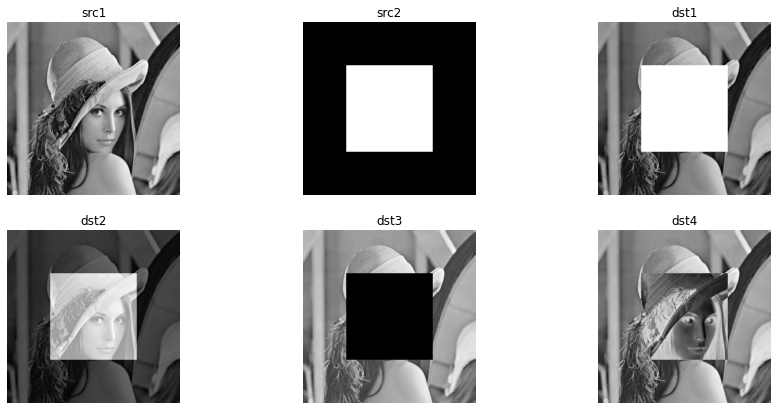

In [27]:
src1 = cv2.imread('./data/lenna256.bmp', cv2.IMREAD_GRAYSCALE)
src2 = cv2.imread('./data/square.bmp', cv2.IMREAD_GRAYSCALE)

if src1 is None or src2 is None:
    print('Image load failed')
    sys.exit()

dst1 = cv2.add(src1, src2)
dst2 = cv2.addWeighted(src1, 0.5, src2, 0.5, 0.0)
dst3 = cv2.subtract(src1, src2)
dst4 = cv2.absdiff(src1, src2)

fig = plt.figure(figsize=(15, 7))

plt.subplot(231)
plt.axis('off')
plt.imshow(src1, 'gray')
plt.title('src1')

plt.subplot(232)
plt.axis('off')
plt.imshow(src2, 'gray')
plt.title('src2')

plt.subplot(233)
plt.axis('off')
plt.imshow(dst1, 'gray')
plt.title('dst1')

plt.subplot(234)
plt.axis('off')
plt.imshow(dst2, 'gray')
plt.title('dst2')

plt.subplot(235)
plt.axis('off')
plt.imshow(dst3, 'gray')
plt.title('dst3')

plt.subplot(236)
plt.axis('off')
plt.imshow(dst4, 'gray')
plt.title('dst4')

Text(0.5, 1.0, 'not')

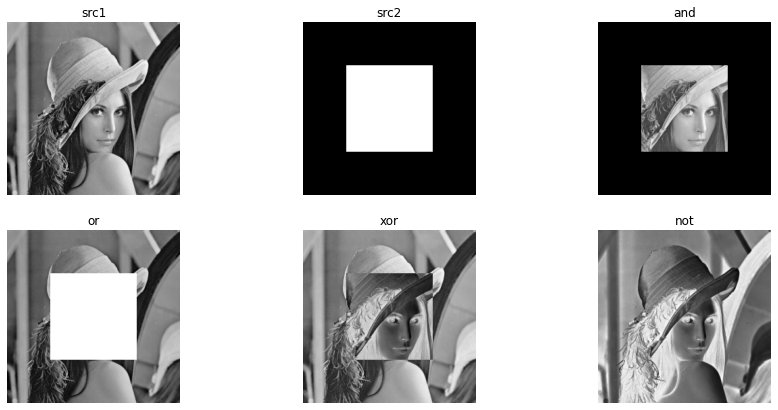

In [28]:
src1 = cv2.imread('./data/lenna256.bmp', cv2.IMREAD_GRAYSCALE)
src2 = cv2.imread('./data/square.bmp', cv2.IMREAD_GRAYSCALE)

if src1 is None or src2 is None:
    print('Image load failed')
    sys.exit()

dst1 = cv2.bitwise_and(src1, src2)
dst2 = cv2.bitwise_or(src1, src2)
dst3 = cv2.bitwise_xor(src1, src2)
dst4 = cv2.bitwise_not(src1)

fig = plt.figure(figsize=(15, 7))

plt.subplot(231)
plt.axis('off')
plt.imshow(src1, 'gray')
plt.title('src1')

plt.subplot(232)
plt.axis('off')
plt.imshow(src2, 'gray')
plt.title('src2')

plt.subplot(233)
plt.axis('off')
plt.imshow(dst1, 'gray')
plt.title('and')

plt.subplot(234)
plt.axis('off')
plt.imshow(dst2, 'gray')
plt.title('or')

plt.subplot(235)
plt.axis('off')
plt.imshow(dst3, 'gray')
plt.title('xor')

plt.subplot(236)
plt.axis('off')
plt.imshow(dst4, 'gray')
plt.title('not')

In [29]:
src = cv2.imread('./data/airplane.bmp', cv2.IMREAD_COLOR)
dst = cv2.imread('./data/field.bmp', cv2.IMREAD_COLOR)

if src is None or dst is None:
    print('Image load failed')
    sys.exit()

gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(gray, 163, 255, cv2.THRESH_BINARY)
mask_not = cv2.bitwise_not(mask)

dst[mask_not > 0] = src[mask_not > 0]

# cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()

In [30]:
airplane = cv2.imread('./data/airplane.bmp', cv2.IMREAD_COLOR)
field = cv2.imread('./data/field.bmp', cv2.IMREAD_COLOR)

gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

ret, mask = cv2.threshold(gray, 160, 255, cv2.THRESH_BINARY_INV )
mask_inv = cv2.bitwise_not(mask)

# option 1
# airplane_fg = np.zeros(airplane.shape, airplane.dtype)
# airplane_fg[mask>0] = src[mask>0]

# field_bg = np.zeros(field.shape, field.dtype)
# field_bg[mask_inv>0] = dst2[mask_inv>0]

# option 2
airplane_fg = cv2.bitwise_and(airplane, airplane, mask=mask)
field_bg = cv2.bitwise_and(field, field, mask=mask_inv)
                           
dst = cv2.bitwise_or(airplane_fg, field_bg)

cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()

In [32]:
lena = cv2.imread('./data/lena.jpg')
logo = cv2.imread('./data/opencv_logo.png')

height, width, channels = logo.shape
roi = lena[0:height, 0:width]

gray = cv2.cvtColor(logo, cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(gray, 160, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)


lena_bg = cv2.bitwise_and(roi, roi, mask=mask)
logo_fg = cv2.bitwise_and(logo, logo, mask=mask_inv)

dst = cv2.bitwise_or(lena_bg, logo_fg)

lena[0:height, 0:width] = dst

cv2.imshow('lena_bg', lena_bg)
cv2.imshow('logo_fg', logo_fg)
cv2.imshow('dst', dst)
cv2.imshow('lena', lena)
cv2.waitKey()
cv2.destroyAllWindows()